# CLASSIFICATION PROBLEM
 
In the previious section we talked about regression which deals with quatitative target variable answering
questions such as how much? or how many?. Regression problems include predicting the price of a house, the age of students and  the salary of an employee. 


$\textbf{In practice, we are more often interested in making categorical assignments: asking not how much? but which one (boy or girl)?}$. We consider a problem to be a classification problem when dealing with qualitative (categorical) target variable with the aim of assigning an input described by vector x to one of the n discrete categories (class) $C_{i}$  where $i = 1,2 \cdots,n$.


A classifier is a map $f(x) \rightarrow C_{i}$


There are numerous classification methods that can be used to predict categorical outcomes, including logistic regression,
support vector machines (SVM) ,decision trees and neural networks

# Logistic regression


The simplest classification problems involves only two classes which are usually lablled $\textbf{1}$for positive ($y=1|x$) and  $\textbf{O}$ for negatice class ($y=0|x$). Classification problems which involving only two categories are often called $\textbf{binary classification}$.


$\textbf{Logistic regression}$ is a probabilistic binary classifier which estimates, for each data point, the conditional probability that it belongs to one of the class.

This can be used to classify an observation into one of two classes (like ‘positive sentiment’ and ‘negative sentiment’, perished and survived, yes and no), from a set of continuous or categorical predictor variables. By choosing a threshold value, we classified output with probability greater than the threshold as one class usually the class labelled $\textbf{1}$ and values below the threshold as belonging to the other class labeled $\textbf{0}$. 

Recall from linear regression
$$\hat y= w^{T}x+b $$

here we are interested in asking the question "what is the probability that given an input vector x the predicted class will be a positive class" so instead of outputting values from the linear model we will modify the output by running the linear function through a sigmoid activation function $\sigma$ to output values with the range of [1,2]


Using the sigmoid function first computes a real-valued \score from $w^{T}x+b$ and then squashes it between [0,1] to turn this score into a probability score

$\hat y$ is then defined to be
$$ \hat{y} =\sigma(\boldsymbol{w}^T \boldsymbol{x} + b). $$
where
$$\boldsymbol{\sigma(z)}=\frac{1}{1+\exp(-z)} $$ and  z is linear function consisting of the input data and their associated
weights and biases. Thus
 $$z=\sum_{i=1}^{n}W_{i}^{T}X_{i} +b_{i}$$






Logistic regression classifies an input by learning from a training set. The model uses the learned weights and biases from the training data, to make a classification on newly unseen but similar instance or example. Each weight $w_{i}$ is a real number, and is associated with one of the input features $x_{i}$. 

$\bullet$We can generalize linear regression to Binary classification by replacing the Gaussian distribution for y with a Bernoulli distribution since the response is binary, $y \in \{0,1 \}$. where


$$ P(y|x,w)=Ber(y|\mu(x)) $$ where $\mu(x)=E[y|x]=P(y=1|X)$
$$\hat y=\mu(x)=\frac{1}{1+\exp(-z)} $$

where x is an input data ,$p(y = 1|x)$ is the probability that the input data belong to class 1 and $p(y = 0|x)=1-p(y = 1|x)$  belonging to the class labelled $0$




The function has a lower bound of zero and an upper bound of 1 and hence the function output values within the
range of $[0,1]$. Logistic sigmoid function is defined as


Using maximum likelihood principle,  for a dataset of $(x_{i},y_{i})$ where $y_{i} \in \{0,1\}$
the likelihood function can be written as



$$P(y|x,w)=\prod_{i}^{n} \hat y^{y_{i}} (1-\hat y)^{1-y_{i}}) $$



In [4]:
import mxnet as mx
from mxnet import nd, autograd, gluon,np,npx
from mxnet.gluon import nn, Trainer
from mxnet.gluon.data import DataLoader, ArrayDataset
import matplotlib.pyplot as plt
import pandas as pd
import d2l
%matplotlib inline
mx.random.seed(12345)  # Added for reproducibility

In [5]:
inputs=nd.arange(5)
m=nn.Activation('sigmoid')
m(inputs)


[0.5        0.7310586  0.880797   0.95257413 0.98201376]
<NDArray 5 @cpu(0)>

In [6]:
def sigmoid(z):
    return 1/(1+nd.exp(-z))
sigmoid(inputs)


[0.5        0.7310586  0.880797   0.95257413 0.98201376]
<NDArray 5 @cpu(0)>

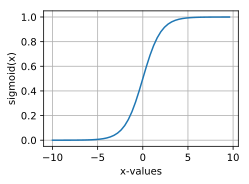

In [15]:
x=nd.arange(-10,10,0.4)
y=sigmoid(x)
d2l.plot(x.asnumpy(),y.asnumpy(),xlabel='x-values',ylabel='sigmoid(x)')
    

# LOSS FUNCTION
The loss function measures how close the classifier output $\hat y$ is to the correct output y




We want to train our model such that it learned parameters (weights and biases) maximizes the probability of the correct 
label prediction $p(y|x)$.
Since only two discrete outcomes are invovled, this is a Bernoulli distribution, Using maximum likelihood principle,  for a dataset of $(x_{i},y_{i})$ where $y_{i} \in \{0,1\}$ the likelihood function can be written as



$$P(y|x,w)=\prod_{i}^{n} \hat y^{y_{i}} (1-\hat y)^{1-y_{i}} $$

maximizing the log likelihood of $P(y|x,w)$ $ \textbf{w.r.t.}$ requires taking the log on both side which becomes

$$logP(y|x,w)=log ( \hat y^{y_{i}} (1-\hat y)^{1-y_{i}}) $$
$$logP(y|x,w)=y_{i}log \hat y + (1-y_{i})log(1 -\hat y) $$

$$logP(y|x,w)=\sum_{i=1}^{n}y_{i}log \hat y + (1-y_{i})log(1 -\hat y) $$


In order to turn this into loss function that need to be minimized, since the maximization problem is equivalent to minimizing the  negative log likelihood (NLL). we will negate the maximization problem to turn it into a minimization problem

$$-logP(y|x,w)=-[y_{i}log \hat y + (1-y_{i})log(1 -\hat y)] $$


We defined the binary crossentropy error to
 
 $E(y, \hat y)=-InP(y|x,w)=-[\sum_{i}^{n}y_{i}In \hat y + (1-y_{i})In(1 -\hat y)] $

# IMPLEMENTING LOSGISTIC REGRESSION

In [1]:
from mxnet import npx,autograd,nd
import d2l
import matplotlib.pyplot as plt
import pandas as pd
from mxnet.gluon import nn
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
# loading the data
data=load_iris()

In [3]:
# converting the data into a dataframe
train_data=pd.DataFrame(data.data,columns=data.feature_names)
# converting the target variable into a dataframe
y_data=pd.DataFrame(data.target,columns=['species'])
# concatinating both the target and the input features into a single dataframe
train_data[['species']]=y_data[['species']]
train_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# renaming some columns
train_data=train_data.rename(columns={"sepal length (cm)":"sepal_length","sepal width (cm)":"sepal_width",
                   "petal length (cm)":"petal_length","petal width (cm)":"petal_width"})
print(train_data.shape)
train_data.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
# turning the data into a binary classification problem by dropping the virginica 
#(where does under species=2) rows from the data
train_data=train_data[train_data['species'] <2]
train_data.shape

(100, 5)

In [6]:
import mxnet as mx
data_ctx = mx.cpu()
# Change this to `mx.gpu(0) if you would like to train on an NVIDIA GPU
model_ctx = mx.cpu()

In [7]:
#train_data=np.array(train_data)
train_data=nd.array(train_data,ctx=data_ctx)
train_data[1:8]


[[4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]]
<NDArray 7x5 @cpu(0)>

In [8]:
x_data=train_data[:,:-1]
x_data[1:4]


[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
<NDArray 3x4 @cpu(0)>

In [9]:
x_data.shape

(100, 4)

In [10]:
y_data=train_data[:,4]
y_data[1:4]


[0. 0. 0.]
<NDArray 3 @cpu(0)>

# Define our model and initialized it parameters

In [11]:
log_reg=nn.Dense(1)

log_reg.initialize(mx.init.Normal(sigma=0.1),ctx=model_ctx)

# Instantiate an optimizer

In [12]:
trainer=mx.gluon.Trainer(log_reg.collect_params(),'sgd',{'learning_rate':0.01})

# The loss function

In [13]:
loss=mx.gluon.loss.SigmoidBinaryCrossEntropyLoss()

# Instantiate a dataloader

In [14]:
data_iter=mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(x_data,y_data),batch_size=35,shuffle=True)

In [15]:
batch_size=10
num_epochs=500
loss_sequence = []
for epoch in range(num_epochs):
    cumulative_loss = 0
    for i,(X,y) in enumerate(data_iter):
        X = X.as_in_context(model_ctx)
        y= y.as_in_context(model_ctx)
        with autograd.record():
            y_hat=log_reg(X)
            los=loss(y_hat,y)
        los.backward() # Compute gradient on l with respect to [w, b]
        trainer.step(batch_size=batch_size)
        cumulative_loss += nd.sum(los).asscalar()
        if epoch %50==0:
            print("Epoch %s, loss: %s" % (epoch, cumulative_loss ))
    loss_sequence.append(cumulative_loss)
    


Epoch 0, loss: 27.432849884033203
Epoch 0, loss: 50.23126983642578
Epoch 0, loss: 71.04180526733398
Epoch 50, loss: 4.46195650100708
Epoch 50, loss: 8.933549404144287
Epoch 50, loss: 12.50886583328247
Epoch 100, loss: 2.3051254749298096
Epoch 100, loss: 4.5243120193481445
Epoch 100, loss: 6.686615943908691
Epoch 150, loss: 1.719932198524475
Epoch 150, loss: 3.2229013442993164
Epoch 150, loss: 4.583946585655212
Epoch 200, loss: 1.2357689142227173
Epoch 200, loss: 2.7147955894470215
Epoch 200, loss: 3.5027706623077393
Epoch 250, loss: 0.9152472019195557
Epoch 250, loss: 1.8904079794883728
Epoch 250, loss: 2.843945860862732
Epoch 300, loss: 0.7293277382850647
Epoch 300, loss: 1.4458703994750977
Epoch 300, loss: 2.398664176464081
Epoch 350, loss: 0.6115909814834595
Epoch 350, loss: 1.4143477082252502
Epoch 350, loss: 2.079356074333191
Epoch 400, loss: 0.6852943897247314
Epoch 400, loss: 1.3853532671928406
Epoch 400, loss: 1.8346311450004578
Epoch 450, loss: 0.5436728000640869
Epoch 450, lo

Text(0,0.5,'average loss')

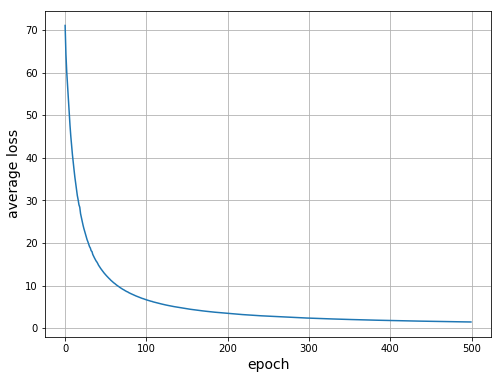

In [16]:
# plot the convergence of the estimated loss function 
plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)
# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('average loss',fontsize=14)

# Defining and training the model with multiple layers

The only requirement for the logistic regression is that the last layer of the network which output will be the predicted output
must be a single neuron. Apache MXNet allows us to do so by using Dense layer and specifying the number of units to 1. The rest of the network can be arbitrarily complex. we define a model which has an input layer of 20 neurons, a couple of inner layers of 10 neurons and 5 each. We stack the layers using HybridSequential block and initialize parameters of the network using Xavier initialization.

In [17]:
net=nn.HybridSequential()

# NETWORK LAYERS
The layers form useful data-transformation pipelines.

In [18]:
net.add(nn.Dense(units=20, activation='relu'))  # input layer
net.add(nn.Dense(units=10, activation='relu'))   # inner layer 1
net.add(nn.Dense(units=5, activation='relu'))   # inner layer 2
net.add(nn.Dense(units=1))   # output layer: notice, it must have only 1 neuron
# initializing model parameters
net.initialize(mx.init.Xavier(),ctx=model_ctx)

In [19]:
# defining our lost function

In [20]:
loss=mx.gluon.loss.SigmoidBinaryCrossEntropyLoss()

In [21]:
trainer1=mx.gluon.Trainer(net.collect_params(),optimizer='sgd',optimizer_params={'learning_rate':0.1})

In [22]:

batch_size=35
num_epochs=500
loss_sequence = []

for epoch in range(num_epochs):
    cumulative_loss = 0
    for i,(X,y) in enumerate(data_iter):
        X = X.as_in_context(model_ctx)
        y= y.as_in_context(model_ctx)
        with autograd.record():
            y_hat=net(X)
            los=loss(y_hat,y)
        los.backward() # Compute gradient on l with respect to [w, b]
        trainer1.step(batch_size=batch_size)
        cumulative_loss += nd.sum(los).asscalar()
        if epoch%50==0:
            print("Epoch %s, loss: %s" % (epoch, cumulative_loss ))
    loss_sequence.append(cumulative_loss)


Epoch 0, loss: 29.344913482666016
Epoch 0, loss: 60.15240287780762
Epoch 0, loss: 81.3232250213623
Epoch 50, loss: 3.8331246376037598
Epoch 50, loss: 6.436842918395996
Epoch 50, loss: 9.122323274612427
Epoch 100, loss: 1.2889041900634766
Epoch 100, loss: 2.9378544092178345
Epoch 100, loss: 4.305048823356628
Epoch 150, loss: 1.1169089078903198
Epoch 150, loss: 2.0439705848693848
Epoch 150, loss: 2.761807084083557
Epoch 200, loss: 0.6834211945533752
Epoch 200, loss: 1.4196966886520386
Epoch 200, loss: 2.0197238326072693
Epoch 250, loss: 0.6010658740997314
Epoch 250, loss: 1.0860811471939087
Epoch 250, loss: 1.5887553691864014
Epoch 300, loss: 0.44216999411582947
Epoch 300, loss: 0.868071049451828
Epoch 300, loss: 1.307661384344101
Epoch 350, loss: 0.3183964490890503
Epoch 350, loss: 0.7156230807304382
Epoch 350, loss: 1.110109120607376
Epoch 400, loss: 0.30737924575805664
Epoch 400, loss: 0.6320922374725342
Epoch 400, loss: 0.9637128412723541
Epoch 450, loss: 0.29364222288131714
Epoch 45

Text(0,0.5,'average loss')

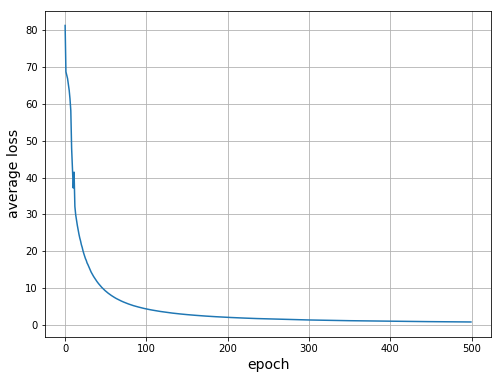

In [23]:
plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('average loss',fontsize=14)